
Machine Learning for Finance  
VU Amsterdam    

**Instructors**  
Iman van Lelyveld (iman.van.lelyveld@vu.nl)<br/>
Dieter Wang (d.wang@vu.nl)  

This project is divided into two sections. Part I is about applying machine learning methods to examine stock returns in various ways. Each question has a technical part (e.g. data-processing, model fitting) and a comprehension part (e.g. explaining your choices, discussing results). While the technical parts are necessary, we value the comprehension part more. Part II is about your general understanding of machine learning, what pitfalls there are and what the challenges machine learning applications may face in the real world. 

**Expectations and general advice**
* Ensure that your notebook runs error-free.
* Only present the necessary code and results.
* Keep your discussions and explanations short and to the point. Very long answers usually hurt more than they help.
* Present visualizations when they are asked for. If you want to include more, make sure they add to your answer.
* All data needed is contained in the `data` folder. 
* Relevant literature is contained in `literature`. It's useful to refer to them but you are not expected to incorporate them into your answers.

<div style='text-align: center; font-weight: bold; padding-top:30px;'>Good luck!</div>

----

<div style="font-size:250%; line-height:120%; padding: 50px 0 20px 0; border-bottom: 4px solid black;">
    Part I: Putting machine learning to use
</div>

# Question 1 [10P]

Load the following data files
* `company.csv` (in `company.zip`, you can unzip it manually beforehand) and call it `df_features`.
Column 1 (`permno`) is the unique company identifier.  
Column 2 (`date`) is the unique date identifier.  
Column 3-95 are the 93 lagged firm characteristics.  

We will refer to these as $X_{it}$. For more information, have a look at Green, Hand, Zhang (2017), in the literature folder.

* `selected-returns.csv` and call it `df_returns`  
Column 1 (`permno`) is the unique company identifier.  
Column 2 (`date`) is the unique date identifier.  
Column 3 (`RET`) is the [Holding Period Return](https://wrds-web.wharton.upenn.edu/wrds/query_forms/variable_documentation.cfm?vendorCode=CRSP&libraryCode=crspa&fileCode=msf&id=ret)  

We will refer to these as $r_{it}$  

The main question you need to answer is: Which companies do you use?
Several factors will determine your decision. 

* You'll notice, that there are many more companies in `df_features` than in `df_returns`. 
* Avoid dropping characteristics from `df_features` and try to use as many as possible. 

Keep in mind that your selection determines the remainder of the programming questions. 

----

**a)**
First focus on `df_returns`. Give a graphical overview of how many company returns are available (=not missing) over time. Which companies do you decide for? Does your choice induce any biases?

**b)**
Next, make yourself familiar with `df_features`. Replace the missing values of a variable with its cross-sectional median. That is, for each variable and at each point in time, replace missing values with the median of available values. 

**c)**
Select those companies and dates that are available in both `df_returns` and `df_features`. 

----

**Hints**  
There are several ways for you to solve this question. Using loops or other methods you come with is perfectly fine. However, it does pay to look at the following pandas functions in more detail. 
* `pd.set_index()`
* `pd.groupby()`
* `pd.stack()` and `pd.unstack()`
* `pd.isna()` and `pd.notna()`
* `pd.resample()` (could be relevant for Question 5...)

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In [1]:
#Import packages 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
#Import files.. 
path1 = os.path.join('data','df_features.csv')
df_features = pd.read_csv(path1)
df_features.head()
df_features['date'] = pd.to_datetime(df_features['date'])
path2 = os.path.join('data','df_returns.csv')
df_returns = pd.read_csv(path2)
df_returns ['date'] = pd.to_datetime(df_returns['date'])


 a) Graphical overview of available companies (not missing values overtime.. )


My answer:
This dataset is clearly an unbalanced dataset where several stocks have varying number of observations overtime. As seen on the following histograms, most stocks (roughly 147 of them) have 120 observations (10 years of data) and the remaining stocks have varying number of month/years. 
Unbalanced data can become a serious issue when dealing with a classification problem where for instance 99% of your data corresponds to class 1 and only 1% of data corresponds to class 2. In this case, when making predictions, the algorithm will only predict class 1 which is not ideal. 

In my case, the application relates to regression algorithms that predict a continuous value (stock returns) and although balanced data is generally more desirable, I can also work with unbalanced data when predicting continuous values. 
The criteria I used to select companies is that I considered stocks/companies that had at least 3 years of data or more (36 monthly observations). The other option would have been to only keep companies that have 10 years of data (balanced data), but I considered this option to be less optimal because I would lose too many stocks and thus, representativeness of the sample data would also be reduced and this would imply a significant survivorship bias. In addition, keeping all of the companies in the dataset would also induce survivorship bias and we would not be able to make asymptotic inferences (which requires an "n" of at least 30 or more) given that some companies only have 2 months of data.. 
I acknoledge that my choice of subsetting the companies that have three years of more of data represents a level of bias, but I do not consider this bias to be high enough to cause a significant effect on the predictions conducted on questions 2 to 5. 

Text(0.5, 1.0, 'Overview of monthly observations for companies in dataset')

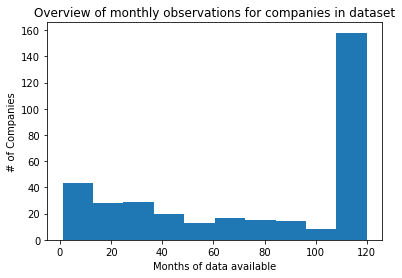

In [3]:
#Months of data available per company
df_ret_timecount = df_returns['permno'].value_counts()
df_ret_timecount
plt.hist(df_ret_timecount , bins = 10)
plt.xlabel('Months of data available')
plt.ylabel("# of Companies")
plt.title('Overview of monthly observations for companies in dataset')

Text(0.5, 1.0, 'Overview of yearly observations for companies in dataset')

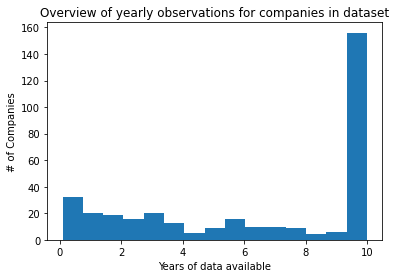

In [4]:
#Years of data available per company... 
df_ret_time_years = df_ret_timecount / 12 
df_ret_time_years.head()
#Years of data available per company
plt.hist(df_ret_time_years , bins = 15)
plt.xlabel('Years of data available')
plt.ylabel("# of Companies")
plt.title('Overview of yearly observations for companies in dataset')

b) Replace the missing values of a variable with its cross-sectional median. That is, for each variable and at each point in time, replace missing values with the median of available values.


In [5]:
#Evaluating missing values for each feature of the non-imputed dataset...... 
df_features.isna().sum()

permno           0
date             0
mvel1           20
beta          6262
betasq        6262
              ... 
maxret           3
retvol          45
std_dolvol      96
std_turn        20
zerotrade       27
Length: 95, dtype: int64

In [3]:
#Visualizing non-imputed dataset....
df_features.head()

,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,2000-01-31,2868.0,-0.073811,0.020791,-0.097727,3.065142,0.068324,-0.097056,-0.020408,...,NaN,NaN,NaN,0.051729,0.000017,0.136364,0.042418,1.382123,2.053254,1.336364e+01
1,10080,2000-02-29,4541.0,-0.081841,0.017610,0.483402,6.348264,0.068271,0.002209,0.583333,...,NaN,NaN,NaN,0.181881,0.000014,0.444444,0.127924,1.801642,24.497492,8.400000e+00
2,10080,2000-03-31,3107.0,0.104741,0.010971,-0.018970,8.959376,0.076380,0.147039,-0.315789,...,NaN,NaN,NaN,0.106763,0.000024,0.217391,0.095731,1.007548,2.234800,3.150000e+00
3,10080,2000-04-28,2868.0,0.012597,0.000159,-0.108316,7.116191,0.080496,0.310041,-0.076923,...,NaN,NaN,NaN,0.193484,0.000025,0.600000,0.170228,1.714707,24.415433,9.130435e-01
4,10080,2000-05-31,3226.5,0.162976,0.026561,0.140756,8.779481,0.137188,0.249398,0.125000,...,0.073539,0.075737,2.0,0.116561,0.000019,0.230769,0.109373,1.121564,7.291179,2.930000e-08


In [4]:
df_features.dtypes

permno                 int64
date          datetime64[ns]
mvel1                float64
beta                 float64
betasq               float64
                   ...      
maxret               float64
retvol               float64
std_dolvol           float64
std_turn             float64
zerotrade            float64
Length: 95, dtype: object

In [7]:
#Imputing the cross-sectional median by grouping by date and filling feature values that don't have data with the median value.
df_features_imp = df_features.fillna(df_features.groupby("date").transform("median"))
#Visualizing cross-sectionally imputed dataset to check...
df_features_imp.head()

,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,2000-01-31,2868.0,-0.073811,0.020791,-0.097727,3.065142,0.068324,-0.097056,-0.020408,...,0.154207,0.153024,4.0,0.051729,0.000017,0.136364,0.042418,1.382123,2.053254,1.336364e+01
1,10080,2000-02-29,4541.0,-0.081841,0.017610,0.483402,6.348264,0.068271,0.002209,0.583333,...,0.149610,0.149502,4.0,0.181881,0.000014,0.444444,0.127924,1.801642,24.497492,8.400000e+00
2,10080,2000-03-31,3107.0,0.104741,0.010971,-0.018970,8.959376,0.076380,0.147039,-0.315789,...,0.149846,0.151396,4.0,0.106763,0.000024,0.217391,0.095731,1.007548,2.234800,3.150000e+00
3,10080,2000-04-28,2868.0,0.012597,0.000159,-0.108316,7.116191,0.080496,0.310041,-0.076923,...,0.149998,0.148704,4.0,0.193484,0.000025,0.600000,0.170228,1.714707,24.415433,9.130435e-01
4,10080,2000-05-31,3226.5,0.162976,0.026561,0.140756,8.779481,0.137188,0.249398,0.125000,...,0.073539,0.075737,2.0,0.116561,0.000019,0.230769,0.109373,1.121564,7.291179,2.930000e-08


In [8]:
#Check the newly created dataframe (imputed) and ensure no values are longer missing... 
df_features_imp.isna().sum()

permno        0
date          0
mvel1         0
beta          0
betasq        0
             ..
maxret        0
retvol        0
std_dolvol    0
std_turn      0
zerotrade     0
Length: 95, dtype: int64

In [9]:
#Alternative way of imputing using KNN Imputer or Simple Imputer.. (much more time consuming, not used..)
#Imputation with KNNImputer 
#from sklearn.impute import KNNImputer 
#imputer = KNNImputer(n_neighbors=5, weights="uniform")
#df_features_imp = pd.DataFrame(imputer.fit_transform(df_features1))
#Imputation...
#df_features.dtypes
#df_features1 = df_features.set_index(['permno','date'])
#df_features1.head()
#Imputing data based on MEDIAN... 
#from sklearn.impute import SimpleImputer 
#imp = SimpleImputer(missing_values=np.nan, strategy='median')
#df_features_imp = pd.DataFrame(imp.fit_transform(df_features1))
#df_features_imp.head()
#Bringing index (company code and date back to dataframe)
#df_features_imp.index = df_features1.index
#df_features_imp.head()
#df_features_imp = df_features_imp.reset_index()
#df_features_imp


c)Select those companies and dates that are available in both df_returns and df_features.


In [10]:
#Create dataframe that counts # of monthly observations for each stock... 
df_countdates = pd.DataFrame(df_returns['permno'].value_counts()).reset_index()
df_countdates.head()
df_countdates.columns = ['permno' , 'countd']
df_countdates

,permno,countd
0,36281,120
1,80592,120
2,84737,120
3,80223,120
4,84161,120
...,...,...
340,20547,1
341,76916,1
342,84418,1
343,72072,1


In [11]:
#Merge df_returns with count of obs...
df_returns= pd.merge(df_returns, df_countdates, how = "left" , on = ['permno'])

In [12]:
#Creating criteria to only subset companies whom have 36 monthly observations (3 years) or more... 
yr_or_greater = df_returns['countd']>=36
#Subseting the original df_returns dataframe based on prior condition... 
df_returns_sub = df_returns[yr_or_greater]
df_returns_sub

,permno,date,RET,countd
0,80223,2000-01-31,0.018235,120
1,80223,2000-02-29,-0.043478,120
2,80223,2000-03-31,0.151515,120
3,80223,2000-04-28,-0.049474,120
4,80223,2000-05-31,0.111111,120
...,...,...,...,...
26555,79472,2009-08-31,0.048309,120
26556,79472,2009-09-30,0.018433,120
26557,79472,2009-10-30,0.262443,120
26558,79472,2009-11-30,-0.071685,120


In [13]:
#Create KEY of company code & date for both df_returns & df_features_imp to merge.... 
df_returns_sub['KEY'] = df_returns_sub['permno'].astype(str) + df_returns_sub['date'].astype(str)
df_features_imp['KEY'] = df_features_imp['permno'].astype(str) + df_features_imp['date'].astype(str)

C:\Users\pmasi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#Merge based on left join of df_returns_sub & df_features... 
df_merged= pd.merge(df_returns_sub, df_features_imp, how = "left" , on = ['KEY'])
del df_merged['date_y']
del df_merged['permno_y']
df_merged.head()

,permno_x,date_x,RET,countd,KEY,mvel1,beta,betasq,chmom,dolvol,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,80223,2000-01-31,0.018235,120,802232000-01-31,99399.00,0.538797,0.290302,0.250980,9.284241,...,0.154207,0.153024,4.0,0.036578,1.050000e-06,0.106557,0.045274,0.870658,0.578843,9.545456e-01
1,80223,2000-02-29,-0.043478,120,802232000-02-29,100860.75,0.540417,0.292051,0.099048,9.250762,...,0.149610,0.149502,4.0,0.052363,5.560000e-07,0.092308,0.034985,1.341841,2.182279,4.690000e-08
2,80223,2000-03-31,0.151515,120,802232000-03-31,96475.50,0.536282,0.287599,0.050222,10.757669,...,0.149846,0.151396,4.0,0.031097,4.720000e-07,0.045455,0.023833,1.418984,6.950942,4.480000e-08
3,80223,2000-04-28,-0.049474,120,802232000-04-28,111093.00,0.533053,0.284146,-0.145230,10.759311,...,0.149998,0.148704,4.0,0.029496,9.010000e-07,0.069767,0.030285,1.299826,1.044665,1.826087e+00
4,80223,2000-05-31,0.111111,120,802232000-05-31,105327.00,0.457308,0.209131,-0.203134,10.147845,...,0.150106,0.160472,4.0,0.016200,3.280000e-07,0.013514,0.010280,1.318185,1.561496,4.421053e+00


# Question 2 [15P]

In this question we ask: What determines the differences between average stock returns? This perspective implies that we do not care much about the time-variation. If this were a linear regression model, you would estimate
$$
r_i = X_i \beta + e_i
$$
Instead, we fit a `Ridge` regression that shrinks the cross sectional coefficients $\beta$ towards zero. How strong the shrinkage is depends on the hyperparameter `alpha`.

**a)**
Compute the average stock return $r_i = \frac{1}{T} \sum_t r_{it}$ and average features $X_i = \frac{1}{T} \sum_t X_{it}$ of each company over the entire sample.

**b)**
Select a cross validator and the number of folds that you deem appropriate for this task. Briefly explain your choice. You will only use this cross validator for Part I.

**c)**
Choose 20 values for `alpha` (e.g. using `np.linspace` or `np.logspace`). Then, use the `cross_validate` function to calculate the average test score (i.e. the score calculated on the test sample) of all cross validation folds for each `alpha`. Do this exercise once with 
* `cross_validate(..., scoring='neg_root_mean_squared_error', ...)` and with 
* `cross_validate(..., scoring='neg_median_absolute_error', ...)`. 

At the end of this subquestion, you should have two series, `sr_rmse_ridge` and `sr_mae_ridge`. Each series should have the 20 alpha values as the index and the corresponding average test scores as values. Plot these two series in a single graph.

**d)**
Discuss how the two series differ and why you think that is the case. If they do not differ, discuss why your results are insensitive to different scoring methods. Decide for one of the two scoring methods.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

a) Compute the average stock return  and average features  of each company over the entire sample.

In [15]:
#Computing the average stock return by grouping by company code and taking the mean of each individual company accross all time...
df_avg_ret = df_merged.groupby('permno_x').mean().reset_index()
#df_avg_ret.head()

b)Select a cross validator and the number of folds that you deem appropriate for this task


My answer:
The number of K-fold is tricky to establish. A higher K implies more variance and lower bias while a lower K implies less variance and more bias. Thus, to be on the safe side, I will consider 5-K folds.. 

c)use the cross_validate function to calculate the average test score (i.e. the score calculated on the test sample) of all cross validation folds for each alpha. Do this exercise once with




In [16]:
#Train/test split application
from sklearn.model_selection import train_test_split
y_avg_ret = df_avg_ret['RET'] #vector of dependent label... 
X_avg_ret = df_avg_ret[df_avg_ret.columns[3:96]] # matrix of 93 features...

X_train, X_test, y_train, y_test = train_test_split(X_avg_ret, y_avg_ret, random_state=5)

In [17]:
#Transforming data prior to fitting a ridge regression... 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
scaler = MinMaxScaler()
# Applying scaling to BOTH test and train sets.... very important.. 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Conducting the grid search with 20 values for alpha RMSE... 
#Ridge Root mean squared error grid search CV 
from sklearn.model_selection import GridSearchCV
model = Ridge()
alpha_param_range = {'alpha':[0.01, 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.320, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76,0.88, 0.92, 0.96]}
ridge_reg_rmse = GridSearchCV(model,alpha_param_range,scoring = 'neg_root_mean_squared_error' , cv = 5)
#Fit the grid search...
ridge_reg_rmse.fit(X_train_scaled,y_train)
#Print best alpha parameter and best score 
print(ridge_reg_rmse.best_params_)
print(ridge_reg_rmse.best_score_)


{'alpha': 0.92}
-0.010081991492474088


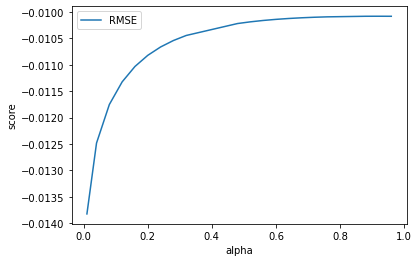

In [19]:
#Putting ridge RMSE in dataframe and plotting... 
ridge_df_rmse = pd.DataFrame(ridge_reg_rmse.cv_results_)
ridge_df_rmse['alpha_range'] = [0.01, 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.320, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76,0.88, 0.92, 0.96]
#ridge_df_rmse[['alpha_range','mean_test_score']]
#Plot of sr_rmse_ridge
plt.plot(ridge_df_rmse['alpha_range'],ridge_df_rmse['mean_test_score'] , label = 'RMSE')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()

In [20]:
#Conducting the grid search with 20 values for alpha MAE... 
# Ridge Median Absolute Error GridSearch CV 
from sklearn.model_selection import GridSearchCV
model = Ridge()
alpha_param_range = {'alpha':[0.01, 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.320, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76,0.88, 0.92, 0.96]}
ridge_reg_mae = GridSearchCV(model,alpha_param_range,scoring = "neg_median_absolute_error" , cv = 5)
ridge_reg_mae.fit(X_train_scaled,y_train)
#Print best alpha parameter and best score 
print(ridge_reg_mae.best_params_)
print(ridge_reg_mae.best_score_)


{'alpha': 0.52}
-0.003788363879022181


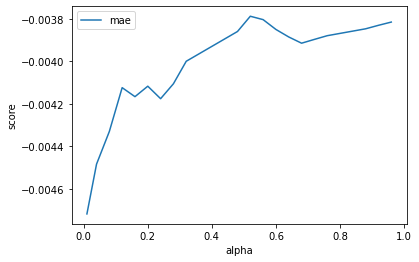

In [21]:
#Putting ridge MAE in dataframe...
ridge_reg_mae = pd.DataFrame(ridge_reg_mae.cv_results_)
ridge_reg_mae['alpha_range'] = [0.01, 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.320, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76,0.88, 0.92, 0.96]
#ridge_reg_mae[['alpha_range','mean_test_score']]
#Plot of sr_mae_ridge
plt.plot(ridge_reg_mae['alpha_range'],ridge_reg_mae['mean_test_score'] , label = "mae")
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()

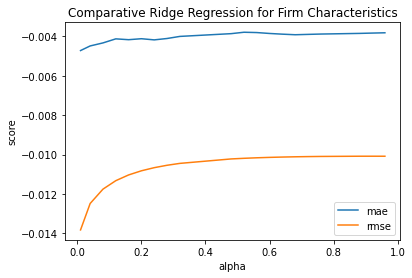

In [22]:
#Comparative plot of Ridge Regression for RMSE & MAE
plt.plot(ridge_reg_mae['alpha_range'],ridge_reg_mae['mean_test_score'] , label = "mae")
plt.plot(ridge_df_rmse['alpha_range'],ridge_df_rmse['mean_test_score'] , label = "rmse")
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Comparative Ridge Regression for Firm Characteristics')
plt.legend()
plt.show()

 d) Discuss how the two series differ and why you think that is the case. If they do not differ, discuss why your results are insensitive to different scoring methods. Decide for one of the two scoring methods.


My answer: 

Both the mean absolute error(MAE) and the root mean squared error(RMSE) measure the average model prediction error indiferent of the direction (+ or -) of such error. These are the two most common metrics to measure accuracy of continuous variables and a lower value signifies better accuracy (the closer to 0, the better).  The main difference between MAE and RMSE is that RMSE gives a high weight to large errors since it squares the error before taking the average of them. In other words, the RMSE punishes high errors while the MAE equally weights all errrors. So only in the case that errors are evenly distributed will the MAE and RMSE be equal. If there is a slight variance in errors, then the RMSE will always be greater (or further away from 0) than the MAE 

By evaluating the results of the ridge regression, this pattern is clearly seen in the Comparative graph where the MAE shows a greater accuracy (closer proximity to 0) than the RMSE for all values of alpha without exception. 

Given that the objective of this project is to make predictions on a continuous variable (returns), and large errors or diferences between the predicted value versus the observed value are not desirable, the RMSE scoring method is the one I chose because it will provide better interpretation and insights given this metric accounts for the penalization of large errors... 



# Question 3 [10P]

While the Ridge model shrinks coefficients towards zero, it rarely sets them to exactly zero. This is what the Lasso does, which is therefore suited for variable selection. In this question you determine which features are most relevant, according to the Lasso. 

**a)** 
Produce a similar graph as you did in the previous question using a `Lasso` model with the **one** scoring method you chose. You may have to adjust the 20 alphas before you calculate `sr_rmse_lasso` **or** `sr_mae_lasso`. 

**b)**
What is the optimal `alpha` parameter? Which features are most predictive if you use this `alpha`? Use a [bar plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) or [horizontal bar plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) to show the non-zero coefficients.

**c)**
Are these selected variables sensible? Briefly discuss your findings using **1 or 2 features** an investor might find interesting. It is not expected of you to discuss **all** selected features. Recall that you can find more information on the features in the paper Green, Hand, Zhang (2017) in the literature folder.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

a)Produce a similar graph as you did in the previous question using a Lasso model with the one scoring method you chose


#Comparing the optimal alpha for lasso (both the rmse and mae) with the ridge calculated in previous question, it is clearly seen that lasso provides better scoring results. This makes sense given the dataset contains a large amount of features and lasso regression is better fit to perform feature selection.. 

In [23]:
#Conducting the grid search with 20 values for alpha RMSE... 
# Lasso Root Mean Squared Error GridSearch CV 
from sklearn.linear_model import Lasso 
model_lasso = Lasso()
#Adjusted alpha to reflect lower range (to find optimal alpha) compared to ridge...
alpha_param_range_l = {'alpha':[0.0e+00, 1.0e-06, 2.0e-06, 3.0e-06, 4.0e-06, 5.0e-06, 6.0e-06,
       7.0e-06, 8.0e-06, 9.0e-06, 1.0e-05, 1.1e-05, 1.2e-05, 1.3e-05,
       1.4e-05, 1.5e-05, 1.6e-05, 1.7e-05, 1.8e-05, 1.9e-05]}
lasso_reg_rmse = GridSearchCV(model_lasso,alpha_param_range_l,scoring = "neg_root_mean_squared_error" , cv = 5)
lasso_reg_rmse.fit(X_train_scaled,y_train)
#Print best alpha parameter and best score 
print(lasso_reg_rmse.best_params_)
print(lasso_reg_rmse.best_score_)

C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001168952881681081, tolerance: 4.086505585065983e-06
  positive)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\User

{'alpha': 1.9e-05}
-0.011357316228425656


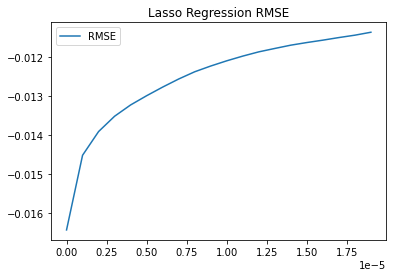

In [24]:
#Putting lasso results in dataframe and plotting.. 
lasso_reg_rmse = pd.DataFrame(lasso_reg_rmse.cv_results_)
lasso_reg_rmse['alpha_range'] = [0.0e+00, 1.0e-06, 2.0e-06, 3.0e-06, 4.0e-06, 5.0e-06, 6.0e-06,
       7.0e-06, 8.0e-06, 9.0e-06, 1.0e-05, 1.1e-05, 1.2e-05, 1.3e-05,
       1.4e-05, 1.5e-05, 1.6e-05, 1.7e-05, 1.8e-05, 1.9e-05]
#lasso_reg_rmse[['alpha_range','mean_test_score']]
#Plot of sr_rmse_lasso
plt.plot(lasso_reg_rmse['alpha_range'],lasso_reg_rmse['mean_test_score'] , label = 'RMSE')
plt.legend()
plt.title('Lasso Regression RMSE')
plt.show()

In [25]:
#Conducting the grid search with 20 values for alpha MAE... 
# Lasso Median Absolute Error GridSearch CV 
model_lasso = Lasso()
alpha_param_range_l = {'alpha':[0.0e+00, 1.0e-06, 2.0e-06, 3.0e-06, 4.0e-06, 5.0e-06, 6.0e-06,
       7.0e-06, 8.0e-06, 9.0e-06, 1.0e-05, 1.1e-05, 1.2e-05, 1.3e-05,
       1.4e-05, 1.5e-05, 1.6e-05, 1.7e-05, 1.8e-05, 1.9e-05]}
lasso_reg_mae = GridSearchCV(model_lasso,alpha_param_range_l,scoring = "neg_median_absolute_error" , cv = 5)
lasso_reg_mae.fit(X_train_scaled,y_train)
#Print best alpha parameter and best score 
print(lasso_reg_mae.best_params_)
print(lasso_reg_mae.best_score_)

C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001168952881681081, tolerance: 4.086505585065983e-06
  positive)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\User

{'alpha': 1.9e-05}
-0.003685859497138378


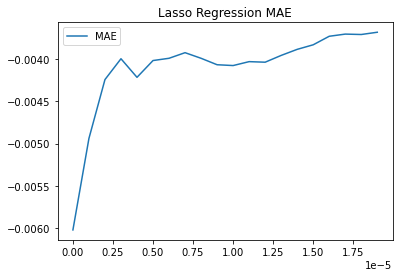

In [26]:
#Putting results in dataframe and plotting... 
lasso_reg_mae = pd.DataFrame(lasso_reg_mae.cv_results_)
lasso_reg_mae['alpha_range'] = [0.0e+00, 1.0e-06, 2.0e-06, 3.0e-06, 4.0e-06, 5.0e-06, 6.0e-06,
       7.0e-06, 8.0e-06, 9.0e-06, 1.0e-05, 1.1e-05, 1.2e-05, 1.3e-05,
       1.4e-05, 1.5e-05, 1.6e-05, 1.7e-05, 1.8e-05, 1.9e-05]
#lasso_reg_mae[['alpha_range','mean_test_score']]
#Plot of sr_rmse_lasso
plt.plot(lasso_reg_mae['alpha_range'],lasso_reg_mae['mean_test_score'] , label = 'MAE')
plt.legend()
plt.title('Lasso Regression MAE')
plt.show()

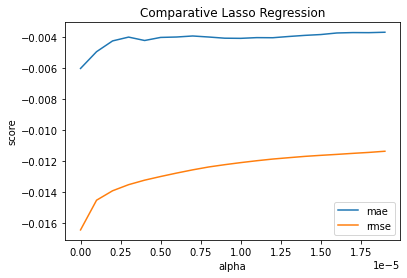

In [27]:
#Comparative plot of lasso regression on MAE & RMSE...
plt.plot(lasso_reg_mae['alpha_range'],lasso_reg_mae['mean_test_score'] , label = "mae")
plt.plot(lasso_reg_rmse['alpha_range'],lasso_reg_rmse['mean_test_score'] , label = "rmse")
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Comparative Lasso Regression')
plt.legend()
plt.show()

b) What is the optimal alpha parameter? Which features are most predictive if you use this alpha? Use a bar plot or horizontal bar plot to show the non-zero coefficients.

The optimal alpha parameter is 1.9e-05 and there are roughly 10 out of 93 features that are the most predictive when using this alpha.. Results are shown below... 

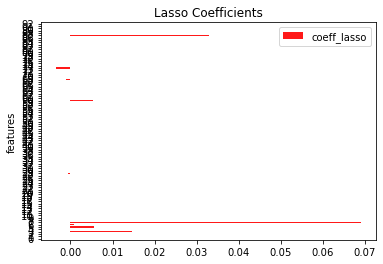

In [28]:
#Fitting lasso model with optimal alpha (under RMSE) found on previous step... 
lassoReg = Lasso(alpha = 1.9e-04)
lassoReg.fit(X_train_scaled,y_train)
pred = lassoReg.predict(X_test_scaled)
#Outputting lasso regression coefficients along with features and plotting to see which feature has more predictive power... 
df_coeff_lasso = pd.DataFrame({'features':np.arange(0,93,1), 'coeff_lasso':lassoReg.coef_})
#df_coeff_lasso.to_csv('feat_lasso.csv')
#Plotting 
df_coeff_lasso.plot.barh(x = 'features' , y = 'coeff_lasso' , align = "center" , alpha = 0.9, color = 'red')
plt.title('Lasso Coefficients')
plt.show()

Feature 7 corresponds to 1 month momentum, feature 87 corresponds to illiquidity... 

 c)Briefly discuss your findings using 1 or 2 features an investor might find interesting. It is not expected of you to discuss all selected features.


My findings are that the two most predictive features that positively impact the cross section of stock returns are 1 month momentum (mom1m) and illiquidity (ill). Results suggest both of these features positively impact the cross section of stock returns and are aligned with theory. On the one hand Jegadeesh & Titman find that trading in short term momentum positively impacts returns, which aligns with the feature I find most predictive. On the other hand, as iliquidity is higher (generally characterized on small cap firms), then average stock returns are higher as well, which is in line with the small-big Fama French Factor model... 


# Question 4 [15P]

The `RandomForestRegressor` is a powerful way to combine DecisionTrees in an ensemble approach. This combined method introduces several new hyperparameters, such as `n_estimators`, `max_depth`, `min_samples_leaf` (see [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for the full list with descriptions). 

**a)**
Select two hyperparameters (**for example** `param1=max_features` and `param2=max_depth`) that you believe are worth conducting an [exhaustive grid search](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) over. Describe which hyperparameters you picked and why you picked them. Also define a sensible grid size and resolution to conduct the gridsearch over.

**Hint**  
If the resolution is too coarse or the grid too small, you may not find the optimal value. If the grid is too fine or the grid too large, computation times may become too high. 

**Hint**  
Set the parameter `criterion` such that it is consistent with your cross validator scoring method.

**b)**
`RandomForestRegressor` has another parameter called `random_state`. How do you treat this hyperparameter? Do you leave the default value? Can you select it as either `param1` or `param2`?

**c)**
Conduct the grid search and use the same cross validation approach as for Ridge and Lasso. At the end you should have a DataFrame with `param` on its index, `param2` on its columns and contains the average test scores as values.   

To visualize your results, import the function `plot_heatmap` from `lib.plots`. To see how to use it, follow the example below or type in `help(plot_heatmap)`. If you have difficulties with the function, you can also choose another way to visualize your results.

```python
# make sure that the folder lib is in the same folder as this notebook!
from lib.plots import plot_heatmap

# generate some random data
df_example = pd.DataFrame(
    np.random.randn(24,20)**2,
)

# plot the heatmap
plot_heatmap(df_example)
```

**d)**
Discuss your results of the `RandomForestRegressor`. Does it perform better than `Ridge` or `Lasso`? Why or why not?

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

a) Select two hyperparameters (for example param1=max_features and param2=max_depth) that you believe are worth conducting an exhaustive grid search over. Describe which hyperparameters you picked and why you picked them. Also define a sensible grid size and resolution to conduct the gridsearch over.


In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state = 4, criterion = 'mae')
print('Parameters currently in use:\n')
print(rfr_model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mae', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}


My answer: 
I selected the max_depth and max_features hyperparameters to conduct an exhaustive grid search. 
The max_depth controls the maximum depth or number of split points in tree, thus, contributing to reducing overfitting by limiting the growth of the tree. Other ways of reducing overfitting are using the max_leaf_nodes or min_samples_split or min_samples_leaf, but including them together with the max_depth would be redundant given one of the parameters (in this case max_depth) will do the job of reducing overfiting. 
The second hyperparameter chosen was the max_features which evaluates the maximum number of features considered for splitting a node. I chose this hyperparameter given I consider of high relevance the # of features to be included in the model.. 

b)RandomForestRegressor has another parameter called random_state. How do you treat this hyperparameter? Do you leave the default value? Can you select it as either param1 or param2?

My answer: The random state is not considered a hyperparameter and should not be tunned. The random state sets a seed to the random generator to yield a fixed or deterministic train/test split outcome. If no seed is set, the outcome of the model will vary. So generally, would be a good practice to randomly select a seed and use this same seed throughout the project. 

c)Conduct the grid search and use the same cross validation approach as for Ridge and Lasso. At the end you should have a DataFrame with param on its index, param2 on its columns and contains the average test scores as values.


In [30]:
#Keep in mind the fit of this model takes a while to calculate...
from sklearn.model_selection import GridSearchCV
#Select two hyperparameters and create parameter grid... 
param_grid_rf = {
    'max_depth': [1,5,7,10,20,25,30,35,40,45,50,55],
    'max_features': [1,2,4, 6,10,15,18,23,30,40,45,50]             }
# Instantiate the grid search model
rf_reg_mae = GridSearchCV(estimator = rfr_model, param_grid = param_grid_rf, 
                          cv = 5, n_jobs = -1, verbose = 2 , scoring = "neg_root_mean_squared_error") ##Using RMSE...
rf_reg_mae.fit(X_train_scaled,y_train)


print(rf_reg_mae.best_params_)
print(rf_reg_mae.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'max_depth': 10, 'max_features': 50}
-0.009997591954440391


In [31]:
#Visualize results of fit and include a matrix of two hyperparameters to be plotted using heatmap... 
df_rf = pd.DataFrame(rf_reg_mae.cv_results_)
df_rf_sub = df_rf[['param_max_depth','param_max_features','mean_test_score']]
#df_rf_sub = df_rf_sub.set_index('param_max_depth')
df_rf_sub.set_index('param_max_depth')
df_rf_sub= pd.pivot_table(df_rf_sub, index = 'param_max_depth' , columns = ['param_max_features'] , aggfunc = max)
df_rf_sub

mean_test_score                                          \
param_max_features              1         2         4         6         10   
param_max_depth                                                              
1                        -0.015055 -0.014854 -0.014526 -0.014297 -0.013900   
5                        -0.014255 -0.013604 -0.012798 -0.012226 -0.011910   
7                        -0.013808 -0.013457 -0.012468 -0.012036 -0.011384   
10                       -0.013723 -0.012908 -0.012151 -0.011685 -0.011073   
20                       -0.013367 -0.012939 -0.012117 -0.011594 -0.011047   
25                       -0.013420 -0.012838 -0.012154 -0.011570 -0.011031   
30                       -0.013456 -0.012845 -0.012149 -0.011567 -0.011031   
35                       -0.013455 -0.012846 -0.012149 -0.011567 -0.011031   
40                       -0.013455 -0.012846 -0.012149 -0.011567 -0.011031   
45                       -0.013455 -0.012846 -0.012149 -0.011567 -0.011031   
50                       -0.013455 -0.012846 -0.012149 -0.011567 -0.011031   
55                       -0.013455 -0.012846 -0.012149 -0.011567 -0.011031   

                                                                      \
param_max_features        15        18        23        30        40   
param_max_depth                                                        
1                  -0.013378 -0.013158 -0.012953 -0.012567 -0.012281   
5                  -0.011330 -0.010907 -0.011011 -0.010406 -0.010817   
7                  -0.010827 -0.010936 -0.010759 -0.010302 -0.010684   
10                 -0.010840 -0.010707 -0.010750 -0.010367 -0.010761   
20                 -0.010842 -0.010854 -0.010765 -0.010400 -0.010733   
25                 -0.010840 -0.010847 -0.010760 -0.010399 -0.010733   
30                 -0.010840 -0.010847 -0.010760 -0.010399 -0.010733   
35                 -0.010840 -0.010847 -0.010760 -0.010399 -0.010733   
40                 -0.010840 -0.010847 -0.010760 -0.010399 -0.010733   
45                 -0.010840 -0.010847 -0.010760 -0.010399 -0.010733   
50                 -0.010840 -0.010847 -0.010760 -0.010399 -0.010733   
55                 -0.010840 -0.010847 -0.010760 -0.010399 -0.010733   

                                        
param_max_features        45        50  
param_max_depth                         
1                  -0.012159 -0.012125  
5                  -0.010225 -0.010104  
7                  -0.010193 -0.010105  
10                 -0.010121 -0.009998  
20                 -0.010172 -0.010129  
25                 -0.010172 -0.010127  
30                 -0.010172 -0.010127  
35                 -0.010172 -0.010127  
40                 -0.010172 -0.010127  
45                 -0.010172 -0.010127  
50                 -0.010172 -0.010127  
55                 -0.010172 -0.010127

Text(33.0, 0.5, 'Max Depth')

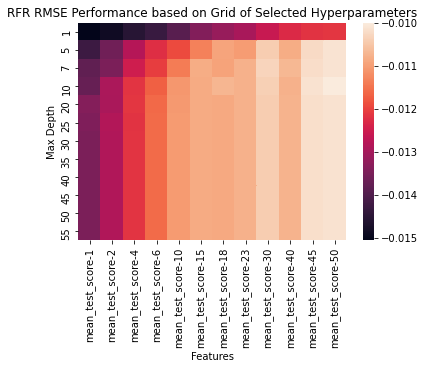

In [32]:
#Plot Hyperparameters max depth and max features to visualize grid results
import seaborn as sns
ax = sns.heatmap(df_rf_sub)
ax.set_title('RFR RMSE Performance based on Grid of Selected Hyperparameters')
plt.xlabel('Features')
plt.ylabel('Max Depth')

d) Discuss your results of the RandomForestRegressor. Does it perform better than Ridge or Lasso? Why or why not?


My Answer..... 
The RFR performs better than the Lasso and slightly worse than the ridge as measured by the RMSE scores in each one of the three models. The main advantage ofthe Random Forest is that it reduces overfitting by averaging several trees. Nevertheless, the disadvantage of random forest regressor is that is more complex and computationally expensive when compared to lasso and ridge. 

The RFR, given the nature of the tree, does not allow for an clear path to feature selection, thus, making it difficult to come up with the most adequate number of features when compared to the lasso regression which is equipped for feature selection. To circumvent this issue in RFR, a grid search based on both max_depth (to restrict tree growth) and number of features was conducted to come up with optimized values for these two hyperparameters. As a result of the exhaustive grid, the RFR algorithm was able to outperform the lasso model as measured by RMSE scores. 


# Question 5 [20P]

We now switch to an entirely different perspective. Before we tried to understand how firm characteristics explain the cross-sectional variation of returns. Now we try to forecast the returns of an equally-weighted stock index $I_t$ one period ahead. This stock index is the simple average of the returns you have selected before. 

$$
I_t = \frac{1}{N} \sum_i r_{it}
$$

To forecast $I_t$ we use the [25 Fama-French double-sorted portfolios](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html). The underlying model is
$$
I_t = F_{t-1}\lambda + u_t
$$

where $F_t$ is are the values of the 25 Fama-French portfolios at time $t$. The vector $\lambda$ has 25 coefficients. 

**a)**
In order to forecast, you could simply estimate the model above using OLS. Why is that not a good idea if the ultimate goal is forecasting? Why is it better to use `Ridge`, `Lasso` or an `RandomForestRegressor`?

**b)** 
Compute the stock index $I_t$ and call it `sr_index`. Load the following predictors 
* `25_Portfolios_5x5.csv`
* `10_Industry_Portfolios.csv`
* `F-F_Momentum_Factor.csv`
* `F-F_Research_Data_5_Factors_2x3.csv`

and store the contents in a dataframe `df_predictors`. These are end-of-month values and have to be lagged by one month.

**c)**
Produce three graphs. The first graph should be comparable to the `Lasso` graph in Question 2c. The second graph should be comparable to the `Ridge` graph in Question 3a. Third, plot a heatmap for this forecasting problem using `RandomForestRegressor`, comparable to Question 4. Do you keep the same cross validator as before?

**d)**
Discuss your results of the `RandomForestRegressor`. Does it perform better than `Ridge` or `Lasso` for this forecasting problem? Why or why not?

**e)**
Are the heatmaps from Question 4 and 5c different from each other? Are they comparable or entirely different? Explain your findings.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

a) In order to forecast, you could simply estimate the model above using OLS. Why is that not a good idea if the ultimate goal is forecasting? Why is it better to use Ridge, Lasso or an RandomForestRegressor?

If the ultimate goal is forecasting, or making accurate predictions in this case of the continuous variable stock return, then a simple linear regression is not the optimal algorithm of choice. The reason is because when using OLS, the model predictions are prone to overfitting and multicollinearity issues may come as a result of doing OLS in the case your dataset contains a significant amount of features. 
Ridge and Lasso regressions capture this weakness in OLS by adding a penalization to coefficients which can result in removing unnecesary features (features that do not add to the explanatory or predictive power) and also discouraging the use of large coefficients. The ridge regression contributes to feature "shrinkage" which leads to smaller coefficients, while the lasso regression contributes to automatic feature selection given it can completely remove features and leave only the most predictive ones. Random forest algorithms also lead to feature selection by training on a random subset of observations (bootstrapping or resampling method) and have a number of hyperparameters to be tunned, after correctly tunning, it can even outperform lasso and ridge regression models. 

b) Compute the stock index  𝐼𝑡  and call it sr_index. Load the following predictors These are end-of-month values and have to be lagged by one month.


In [33]:
#Compute the Stock Index by grouping by date(month) and taking mean of stock returns... 
sr_index = df_merged.groupby('date_x')[['RET']].mean().reset_index()
sr_index.head()
#Converting date to year_month to merge dataframe with df_predictors
sr_index['year'] = pd.DatetimeIndex(sr_index['date_x']).year
sr_index['month'] = pd.DatetimeIndex(sr_index['date_x']).month
sr_index['month'] = sr_index.month.map("{:02}".format)
sr_index['year_mo'] = sr_index['year'].map(str) + sr_index['month'].map(str)
sr_index['year_mo'] = sr_index['year_mo'].astype(str).astype(int)
#sr_index.head()

In [34]:
#Loading 4 datasets of predictors........ 
path3 = os.path.join('data','10_Industry_Portfolios.csv')
Industry_Portfolios = pd.read_csv(path3)
Industry_Portfolios.rename( columns={'Unnamed: 0':'year_mo'}, inplace=True )
path4 = os.path.join('data','25_Portfolios_5x5.csv')
Portfolios_5x5 = pd.read_csv(path4)
Portfolios_5x5.rename( columns={'Unnamed: 0':'year_mo'}, inplace=True )
path5 = os.path.join('data','F-F_Momentum_Factor.csv')
FF_Mom_Factor = pd.read_csv(path5)
FF_Mom_Factor.rename(columns={'Unnamed: 0':'year_mo'}, inplace=True )
path6 = os.path.join('data','F-F_Research_Data_5_Factors_2x3.csv')
FF_Res_5_Factor = pd.read_csv(path6)
FF_Res_5_Factor.rename(columns={'Unnamed: 0':'year_mo'}, inplace=True )

In [35]:
#Merging all predictors into 1 single dataframe using outer join... 
from functools import reduce
df_pred  = [FF_Mom_Factor,FF_Res_5_Factor,Portfolios_5x5,Industry_Portfolios]
df_predictors = reduce(lambda left,right: pd.merge(left,right,on='year_mo', how = 'outer'), df_pred)
#df_predictors.head()
#Subsetting data only for the period corresponding to stock index "it".. 
sub_Crit = df_predictors['year_mo']>=199912
df_predictors = df_predictors[sub_Crit]
#df_predictors.head()
#df_predictors.dtypes

In [36]:
#Visualizing final dataset merged...
df_final = sr_index.merge(df_predictors , on = 'year_mo' , how = 'left')
df_final.head()

,date_x,RET,year,month,year_mo,Mom,Mkt-RF,SMB,HML,RMW,...,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,2000-01-31,0.047656,2000,01,200001,1.86,-4.74,4.15,-0.29,-6.05,...,-4.77,-0.87,-7.99,0.90,-4.71,-4.04,-11.23,7.56,5.75,-4.64
1,2000-02-29,0.090212,2000,02,200002,18.36,2.45,18.32,-9.93,-18.33,...,-6.19,-7.95,-4.24,-5.44,18.18,-3.59,-3.86,-2.88,-7.26,-6.98
2,2000-03-31,0.044422,2000,03,200003,-6.39,5.20,-14.91,7.38,11.68,...,7.74,10.51,8.36,12.26,3.95,7.57,13.28,0.28,5.77,14.12
3,2000-04-28,-0.047747,2000,04,200004,-8.58,-6.40,-5.55,8.61,7.55,...,-1.82,9.27,0.96,-1.98,-10.69,-7.90,-4.27,5.25,7.60,-3.41
4,2000-05-31,-0.031626,2000,05,200005,-9.08,-4.42,-3.68,2.56,4.63,...,7.22,-13.22,-1.41,9.44,-10.84,-10.41,-2.70,3.94,3.90,3.46


In [37]:
#Shifting dependent variable to represent the lag It+1 = Ft * lambda + ui which is equivalent as It = Ft-1 * lambda + ui
df_final['RET_shifted'] = df_final['RET'].shift(-1)

In [38]:
#Excluding the risk free rate column given it is not a predictive factor (it is only used to calculate the market premium over the risk free rate)
del df_final['RF']

In [39]:
df_final.head()

,date_x,RET,year,month,year_mo,Mom,Mkt-RF,SMB,HML,RMW,...,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,RET_shifted
0,2000-01-31,0.047656,2000,01,200001,1.86,-4.74,4.15,-0.29,-6.05,...,-0.87,-7.99,0.90,-4.71,-4.04,-11.23,7.56,5.75,-4.64,0.090212
1,2000-02-29,0.090212,2000,02,200002,18.36,2.45,18.32,-9.93,-18.33,...,-7.95,-4.24,-5.44,18.18,-3.59,-3.86,-2.88,-7.26,-6.98,0.044422
2,2000-03-31,0.044422,2000,03,200003,-6.39,5.20,-14.91,7.38,11.68,...,10.51,8.36,12.26,3.95,7.57,13.28,0.28,5.77,14.12,-0.047747
3,2000-04-28,-0.047747,2000,04,200004,-8.58,-6.40,-5.55,8.61,7.55,...,9.27,0.96,-1.98,-10.69,-7.90,-4.27,5.25,7.60,-3.41,-0.031626
4,2000-05-31,-0.031626,2000,05,200005,-9.08,-4.42,-3.68,2.56,4.63,...,-13.22,-1.41,9.44,-10.84,-10.41,-2.70,3.94,3.90,3.46,0.059152


c)Produce three graphs. The first graph should be comparable to the **RIDGE** graph in Question 2c. The second graph should be comparable to the **LASSO** graph in Question 3a. Third, plot a heatmap for this forecasting problem using **RandomForestRegressor**, comparable to Question 4. Do you keep the same cross validator as before?


In [40]:
#Train/test split application
#_ts stands for timeseries...
from sklearn.model_selection import train_test_split
y_avg_ret_ts = df_final['RET_shifted'] #vector of dependent label... 
X_avg_ret_ts = df_final[df_final.columns[5:47]] # matrix of 42 predictors...

X_train, X_test, y_train, y_test = train_test_split(X_avg_ret_ts, y_avg_ret_ts, random_state=5)

In [41]:
#Transforming data prior to fitting a RIDGE regression... 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Applying scaling to BOTH test and train sets.... very important.. 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
#Ridge regression fit for predictors... 
#Conducting the grid search with 20 values for alpha RMSE... 
#Ridge Root mean squared error grid search CV 
from sklearn.model_selection import GridSearchCV
model_ts = Ridge()
alpha_param_range_ts = {'alpha':[0.01, 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.320, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76,0.88, 0.92, 0.96]}
ridge_reg_rmse_ts = GridSearchCV(model_ts,alpha_param_range_ts,scoring = 'neg_root_mean_squared_error' , cv = 5)
#Fit the grid search...
ridge_reg_rmse_ts.fit(X_train_scaled,y_train)
#Print best alpha parameter and best score 
print(ridge_reg_rmse_ts.best_params_)
print(ridge_reg_rmse_ts.best_score_)





{'alpha': 0.01}
-0.0011249245005767157


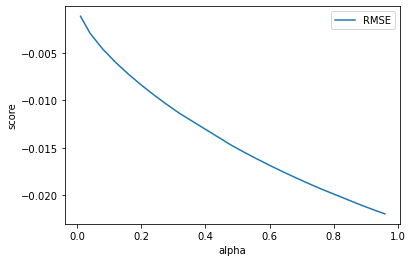

In [43]:
#Putting ridge RMSE in dataframe and plotting... 
ridge_reg_rmse_ts = pd.DataFrame(ridge_reg_rmse_ts.cv_results_)
ridge_reg_rmse_ts['alpha_range'] = [0.01, 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.320, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76,0.88, 0.92, 0.96]
#ridge_reg_rmse_ts[['alpha_range','mean_test_score']]
#Plot of sr_rmse_ridge
plt.plot(ridge_reg_rmse_ts['alpha_range'],ridge_reg_rmse_ts['mean_test_score'] , label = 'RMSE')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()

In [44]:
#Conducting the grid search with 20 values for alpha MAE... 
# Ridge Median Absolute Error GridSearch CV 
from sklearn.model_selection import GridSearchCV
model_ts = Ridge()
alpha_param_range = {'alpha':[0.01, 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.320, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76,0.88, 0.92, 0.96]}
ridge_reg_mae_ts = GridSearchCV(model_ts,alpha_param_range,scoring = "neg_median_absolute_error" , cv = 5)
ridge_reg_mae_ts.fit(X_train_scaled,y_train)
#Print best alpha parameter and best score 
print(ridge_reg_mae_ts.best_params_)
print(ridge_reg_mae_ts.best_score_)


{'alpha': 0.01}
-0.0004943443290044546


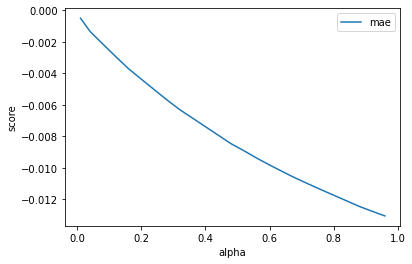

In [45]:
#Putting ridge MAE in dataframe...
ridge_reg_mae_ts = pd.DataFrame(ridge_reg_mae_ts.cv_results_)
ridge_reg_mae_ts['alpha_range'] = [0.01, 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.320, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76,0.88, 0.92, 0.96]
#ridge_reg_mae_ts[['alpha_range','mean_test_score']]
#Plot of sr_mae_ridge
plt.plot(ridge_reg_mae_ts['alpha_range'],ridge_reg_mae_ts['mean_test_score'] , label = "mae")
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()

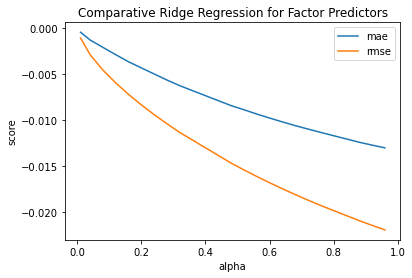

In [46]:
#Comparative plot of Ridge Regression for RMSE & MAE
plt.plot(ridge_reg_mae_ts['alpha_range'],ridge_reg_mae_ts['mean_test_score'] , label = "mae")
plt.plot(ridge_reg_rmse_ts['alpha_range'],ridge_reg_rmse_ts['mean_test_score'] , label = "rmse")
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Comparative Ridge Regression for Factor Predictors')
plt.legend()
plt.show()

In [47]:
#Lasso regression fit for predictors... 
#Conducting the grid search with 20 values for alpha RMSE... 
# Lasso Root Mean Squared Error GridSearch CV 
from sklearn.linear_model import Lasso 
model_lasso_ts = Lasso()
#Adjusted alpha to reflect lower range (to find optimal alpha) compared to ridge...
alpha_param_range_l_ts = {'alpha':[0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019]}
lasso_reg_rmse_ts = GridSearchCV(model_lasso_ts,alpha_param_range_l_ts,scoring = "neg_root_mean_squared_error" , cv = 5)
lasso_reg_rmse_ts.fit(X_train_scaled,y_train)
#Print best alpha parameter and best score 
print(lasso_reg_rmse_ts.best_params_)
print(lasso_reg_rmse_ts.best_score_)

C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_va

{'alpha': 0.0}
-0.0003418429140609229


C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


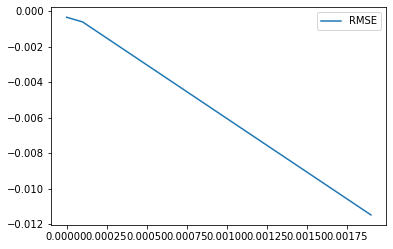

In [48]:
#Putting lasso results in dataframe and plotting.. 
lasso_reg_rmse_ts = pd.DataFrame(lasso_reg_rmse_ts.cv_results_)
lasso_reg_rmse_ts['alpha_range'] = [0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019]
#lasso_reg_rmse_ts[['alpha_range','mean_test_score']]
#Plot of sr_rmse_lasso
plt.plot(lasso_reg_rmse_ts['alpha_range'],lasso_reg_rmse_ts['mean_test_score'] , label = 'RMSE')
plt.legend()
plt.show()

In [49]:
#Conducting the grid search with 20 values for alpha MAE... 
# Lasso Median Absolute Error GridSearch CV 
model_lasso_ts = Lasso()
alpha_param_range_l_ts = {'alpha':[0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019]}
lasso_reg_mae_ts = GridSearchCV(model_lasso_ts,alpha_param_range_l_ts,scoring = "neg_median_absolute_error" , cv = 5)
lasso_reg_mae_ts.fit(X_train_scaled,y_train)
#Print best alpha parameter and best score 
print(lasso_reg_mae_ts.best_params_)
print(lasso_reg_mae_ts.best_score_)

C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_va

{'alpha': 0.0}
-0.00016384366698405368


C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\pmasi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


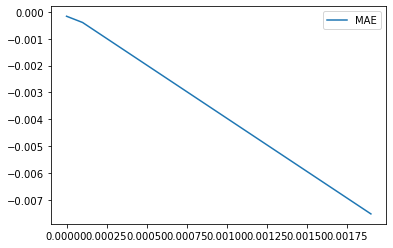

In [50]:
#Putting results in dataframe and plotting... 
lasso_reg_mae_ts = pd.DataFrame(lasso_reg_mae_ts.cv_results_)
lasso_reg_mae_ts['alpha_range'] = [0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019]
#lasso_reg_mae_ts[['alpha_range','mean_test_score']]
#Plot of sr_rmse_lasso
plt.plot(lasso_reg_mae_ts['alpha_range'],lasso_reg_mae_ts['mean_test_score'] , label = 'MAE')
plt.legend()
plt.show()

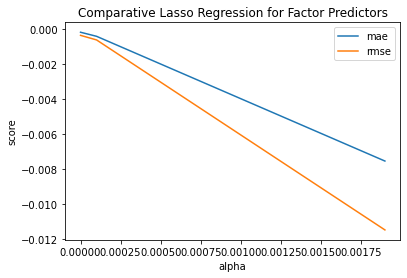

In [51]:
#Comparative plot of lasso regression on MAE & RMSE...
plt.plot(lasso_reg_mae_ts['alpha_range'],lasso_reg_mae_ts['mean_test_score'] , label = "mae")
plt.plot(lasso_reg_rmse_ts['alpha_range'],lasso_reg_rmse_ts['mean_test_score'] , label = "rmse")
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Comparative Lasso Regression for Factor Predictors')
plt.legend()
plt.show()

In [52]:
#RandomForest for factor predictors... 
from sklearn.ensemble import RandomForestRegressor
rfr_model_ts = RandomForestRegressor(random_state = 4, criterion = 'mae')
print('Parameters currently in use:\n')
print(rfr_model_ts.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mae', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}


In [53]:
#Keep in mind the fit of this model takes around 3 min to calculate...
from sklearn.model_selection import GridSearchCV
#Select two hyperparameters and create parameter grid... 
param_grid_rf_ts = {
    'max_depth': [1,2,5,7,9,10,20,25,28,30,35,40,45,50,55],
    'max_features': [1,2,5,8,14,16,23,26,28,29,31,33,36,38,40]             }
# Instantiate the grid search model
rf_reg_mae_ts = GridSearchCV(estimator = rfr_model_ts, param_grid = param_grid_rf_ts, 
                          cv = 5, n_jobs = -1, verbose = 2 , scoring = "neg_root_mean_squared_error") ##Using RMSE...
rf_reg_mae_ts.fit(X_train_scaled,y_train)

print(rf_reg_mae_ts.best_params_)
print(rf_reg_mae_ts.best_score_)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
{'max_depth': 7, 'max_features': 40}
-0.013129045548012766


In [54]:
#Visualize results of fit and include a matrix of two hyperparameters to be plotted using heatmap... 
df_rf_ts = pd.DataFrame(rf_reg_mae_ts.cv_results_)
df_rf_sub_ts = df_rf_ts[['param_max_depth','param_max_features','mean_test_score']]
#df_rf_sub_ts = df_rf_sub_ts.set_index('param_max_depth')
df_rf_sub_ts.set_index('param_max_depth')
df_rf_sub_ts= pd.pivot_table(df_rf_sub_ts, index = 'param_max_depth' , columns = ['param_max_features'] , aggfunc = max)
df_rf_sub_ts

mean_test_score                                          \
param_max_features              1         2         5         8         14   
param_max_depth                                                              
1                        -0.054893 -0.054610 -0.051751 -0.049285 -0.045808   
2                        -0.054899 -0.054716 -0.050511 -0.046161 -0.040745   
5                        -0.053768 -0.052200 -0.043455 -0.039411 -0.029711   
7                        -0.053319 -0.051024 -0.042443 -0.037301 -0.029227   
9                        -0.053714 -0.050392 -0.041792 -0.036702 -0.028839   
10                       -0.054142 -0.050328 -0.041615 -0.037432 -0.029425   
20                       -0.053004 -0.050299 -0.041481 -0.037028 -0.029290   
25                       -0.053007 -0.050300 -0.041477 -0.037028 -0.029290   
28                       -0.053007 -0.050300 -0.041477 -0.037028 -0.029290   
30                       -0.053007 -0.050300 -0.041477 -0.037028 -0.029290   
35                       -0.053007 -0.050300 -0.041477 -0.037028 -0.029290   
40                       -0.053007 -0.050300 -0.041477 -0.037028 -0.029290   
45                       -0.053007 -0.050300 -0.041477 -0.037028 -0.029290   
50                       -0.053007 -0.050300 -0.041477 -0.037028 -0.029290   
55                       -0.053007 -0.050300 -0.041477 -0.037028 -0.029290   

                                                                      \
param_max_features        16        23        26        28        29   
param_max_depth                                                        
1                  -0.045105 -0.041301 -0.039782 -0.039015 -0.038599   
2                  -0.038998 -0.031272 -0.029086 -0.028146 -0.027427   
5                  -0.028782 -0.020053 -0.019208 -0.017614 -0.017294   
7                  -0.027282 -0.019625 -0.018020 -0.017515 -0.016614   
9                  -0.026552 -0.019660 -0.018321 -0.016758 -0.016697   
10                 -0.027158 -0.019439 -0.018392 -0.016572 -0.016846   
20                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   
25                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   
28                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   
30                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   
35                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   
40                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   
45                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   
50                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   
55                 -0.027414 -0.019375 -0.018404 -0.016674 -0.016814   

                                                                      
param_max_features        31        33        36        38        40  
param_max_depth                                                       
1                  -0.037045 -0.035609 -0.034798 -0.034274 -0.033268  
2                  -0.026173 -0.024075 -0.021354 -0.021296 -0.019711  
5                  -0.016069 -0.015268 -0.014152 -0.013549 -0.013163  
7                  -0.015949 -0.015016 -0.013477 -0.013589 -0.013129  
9                  -0.015792 -0.015028 -0.013897 -0.013581 -0.013234  
10                 -0.015835 -0.014967 -0.013871 -0.013583 -0.013293  
20                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299  
25                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299  
28                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299  
30                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299  
35                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299  
40                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299  
45                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299  
50                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299  
55                 -0.015959 -0.014966 -0.013886 -0.013586 -0.013299

Text(33.0, 0.5, 'Max Depth')

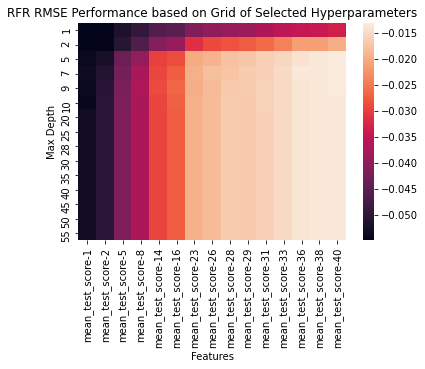

In [55]:
#Plot Hyperparameters max depth and max features to visualize grid results
import seaborn as sns
ax = sns.heatmap(df_rf_sub_ts)
ax.set_title('RFR RMSE Performance based on Grid of Selected Hyperparameters')
plt.xlabel('Features')
plt.ylabel('Max Depth')

d) Discuss your results of the RandomForestRegressor. Does it perform better than Ridge or Lasso for this forecasting problem? Why or why not?


In this case, the RFR did not outperform neither the ridge nor the lasso models for forecasting returns based on factor characteristics. One possible explanation could be that when compared to firm characteristics, the optimal RFR utilized 10 more features (Q4) than in this exercise. In addition to that, it might also be the case that firm characteristics add more to the explanatory power of stock returns than traditional factor predictors considered in this question. 

e) Are the heatmaps from Question 4 and 5c different from each other? Are they comparable or entirely different? Explain your findings.


My answer: 

The heatmap are somewhat comparable to results in question 4 in the sense that optimal (or close to optimal) RMSE scores based on number of features are skewed to the right on both maps. In other words, there lower number of features (say between 0 and 10 are associated with greater RMSE when compared to large amount of features. Also, the max depth on Q4's heatmap seems to exhibit higher RMSE scores between 0 and 8 trees versus lower scores when max depth is between 10 and 25. For Q5, max depth seems to be indifferent by the amount of trees, so the choice of grid range for the max_depth might not have been the optimal and should be further investigated to perhaps narrow down this range. 


# Bonus question [5P]
Use any method you learned throughout the course and try to beat the best `RandomForestRegressor` from the previous question. Which model did you decide for and what motivated your choice? How much better does your model do in forecasting than the best `RandomForestRegressor`?

**Note:** Bonus points will only be awarded if the forecasting results are **convincingly** better. 

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In [56]:
#Gradient Booster Regressor for factor predictors... 
from sklearn.ensemble import GradientBoostingRegressor
gbr_model_ts = GradientBoostingRegressor(random_state = 4)
print('Parameters currently in use:\n')
print(gbr_model_ts.get_params())

Parameters currently in use:

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 4, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [57]:
#Keep in mind the fit of this model takes around 1 min to calculate...
from sklearn.model_selection import GridSearchCV
#Select two hyperparameters and create parameter grid... 
param_grid_gbr_ts = {
    'max_depth': [1,2,5,7,9,10,20,25,28,30,35,40,45,50,55],
    'max_features': [1,2,5,8,14,16,23,26,28,29,31,33,36,38,40]             }
# Instantiate the grid search model
gbr_reg_rmse_ts = GridSearchCV(estimator = gbr_model_ts, param_grid = param_grid_gbr_ts, 
                          cv = 5, n_jobs = -1, verbose = 2 , scoring = "neg_root_mean_squared_error") ##Using RMSE...
gbr_reg_rmse_ts.fit(X_train_scaled,y_train)

print(gbr_reg_rmse_ts.best_params_)
print(gbr_reg_rmse_ts.best_score_)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
{'max_depth': 1, 'max_features': 40}
-0.010463984396242054


My answer: 

In this section, I chose to use the Gradient Boosting Regressor to try and beat the Random Forest regressor and indeed it has beaten the random forest judging by the RMSE being closer to 0 on the gradient booster when compared to the random forest regressor 

<div style="font-size:250%; line-height:120%; padding: 50px 0 20px 0; border-bottom: 4px solid black;">Part II: A critical view on machine learning</div>

# Question 6 [10P]
Different from grid search, parallelization can significantly speed up gradient descent optimization methods. However, a computer with four cores doesn’t necessarily lead to four times the speed of a single core.

Do you agree with this statement? Provide your arguments and relate it to the grid search you did for `RandomForestRegressor` in Question 4.

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

I DO agree given we cannot apply parallelization on 100% of the code. There are certain parts of the code that cannot be done in paralell. In addition, parallelization refers to running more than one process at a time (or simultaneously running several processes). The cores of a computer are the chips that enable the processess to run,thus, the more cores you have the more parallelization you can have. Nevertheless, the parallelization speed is not proportional to the number of cores your computer has because there is also time spent on the interconection among these cores and it is also a function of the program you are ussing to run the system. Finding a program that achieves full paralellization can become very challenging, if not hardly achievable.  

# Question 7 [10P]
Splits in a decision tree are based on reducing impurity. Name and explain one of the three impurity measures we discussed. How can splitting the sample reduce the overall impurity? How did this influence your calculations for `RandomForestRegressor` in Question 4?

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

There are three impurity measures discussed in class. The GINI, ENTROPY and Information GAIN. I will focus on Entropy and Information Gain. 
Entropy is best explained as the amount of randomness or uncertainty in the sample data and it is bounded between 0 and 1. It is used to calculate the homogeneity of the sample in a specific node. The lowest the entropy (closer to 0), the more homogeneous (pure) the node, and the highest the node (closer to 1) the more heterogeneous (or equally divided between classes) 
Information Gain is explained as the information that increases the level of certainty after prunning or splitting. It is essentially the opposite of entropy given that as entropy decreases (increases), information gain increases (decreases). Information gain is calculated as the entropy before the split minus the weighted entropy after the split.. 


The objective of prediction based on a decision tree is to build a decision tree algorithm where branches are created based on features/attributes until all leaves remain pure (homogeneous class). Nevertheless, this inevitably leads to overfitting, so to prevent overfitting we need to SPLIT or PRUNE the tree. To do this I generally use the parameter "maximum depth" which limits the growth of the tree up to a predetermined value set by the user..
In Q4, I have used the maximum depth parameter to conduct an exhaustive grid search to determine what was the optimal level of this hypeparameter in the RandomForestRegressor. Again, the reason why I chose this parameter is because I wanted to ensure I used the optimal level of max_depth so that my regression output did not exhibit OVERFITTING patterns.. 


# Question 8 [10P]
What do we optimize in a regression problem versus a classification problem? Would it be wrong to calculate the `RandomForestClassifier` in Question 4? Argue why it could be useful or why not.

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In a classification problem, the objective is to predict a label which can be a binary or multiclass label. In a regression problem, the objective is to predict a continuous value, so classification and regression have clearly different optimization objectives. 
It will NOT be wise to use the Random Forest CLASSIFIER in question 4 given that the dependent variable/label (i.e stock returns) is a continuous variable, NOT a binary/categorical label. Given this, using the RandomForestRegressor would be the correct way to approach the problem. 

Only if the dependent label were to be a binary or categorical class, a classifier algorithm (such as RandomForestClassifier) would be deemed appropiate.  
